In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import math

# pregunta 1

¿Cuánto es el máximo que podemos llegar a pagar en un día por los servidores?

In [2]:
import math

coste_nodo = 130
coste_nodo_3up = 110
horas_por_nodo = 72
num_analistas = 14
horas_max_job = 33.1


def coste_nodos(nodos_necesarios: int) -> int:
    if nodos_necesarios > 2:
        coste_nodos_max = (nodos_necesarios - 2) * coste_nodo_3up + (2 * coste_nodo)
    else:
        coste_nodos_max = nodos_necesarios * coste_nodo
    return coste_nodos_max

horas_max = num_analistas * horas_max_job
nodos_necesarios = int(math.ceil(horas_max / horas_por_nodo))

print("El coste máximo a pagar en 1 día es de {0}€".format(coste_nodos(nodos_necesarios)))

El coste máximo a pagar en 1 día es de 810€


## pregunta 2

Pinta un histograma de la distribución de los costes diarios realizando simulaciones de Monte Carlo.

¿Cuál es el coste medio por día que esperamos tener que pagar por los servidores, si siempre pagamos todos los servidores que hacen falta en un día dado?

El coste medio sería de 155.85€


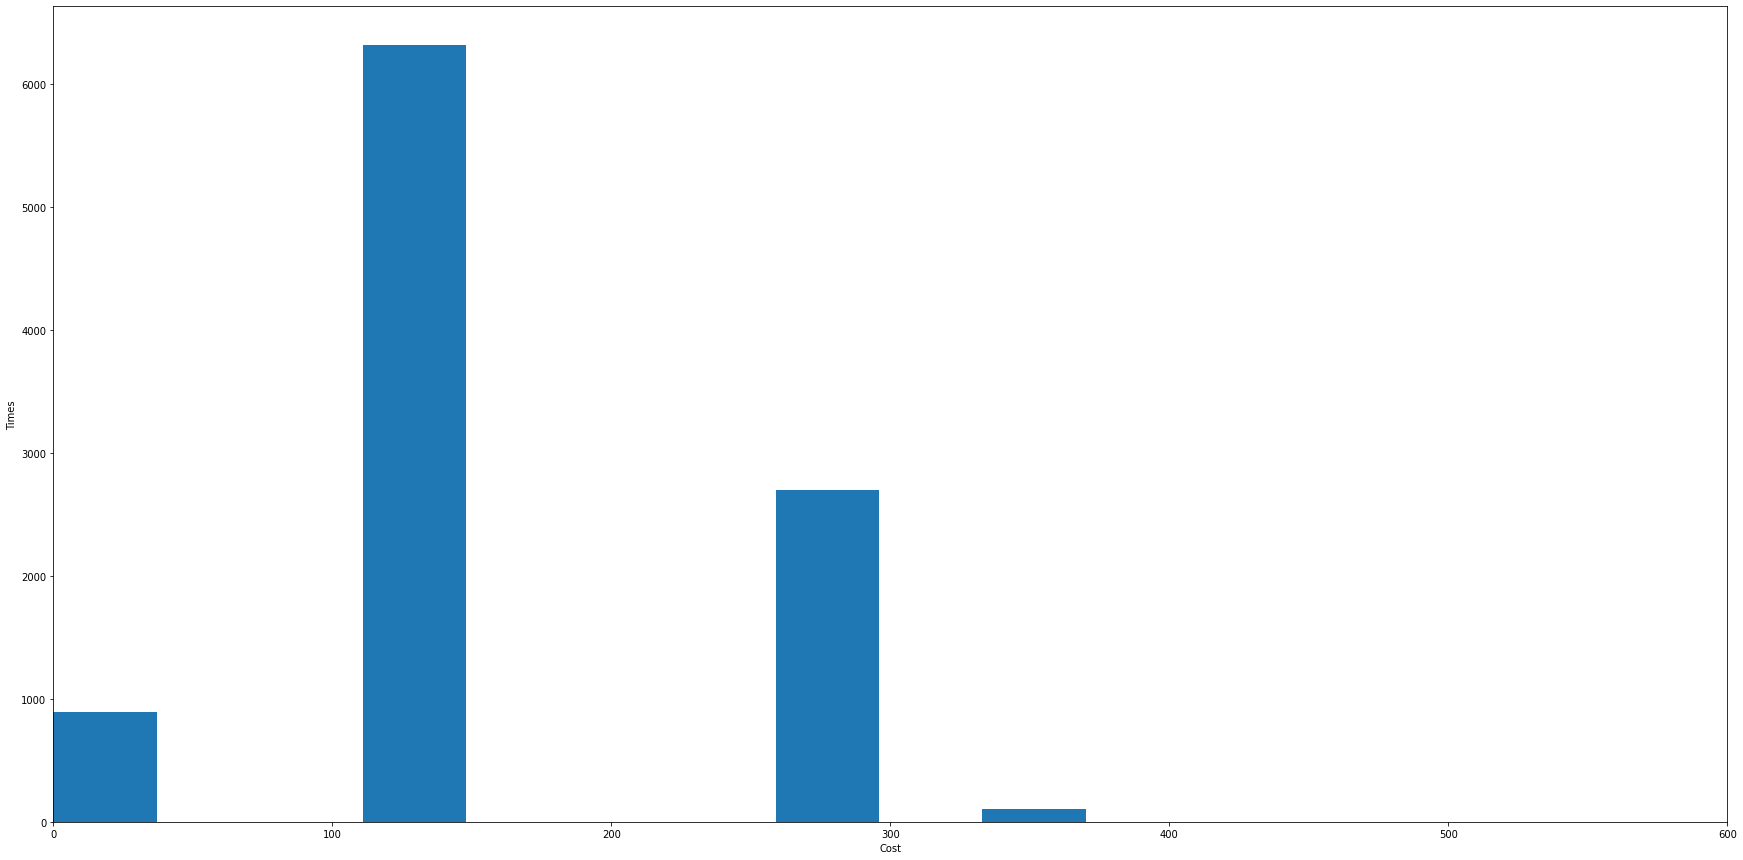

In [3]:
def job_duration():
    # probabilidad de sacar entre 15.7 y 33.1 horas
    return np.random.uniform(15.7, 33.1)


def simulation_done():
    return np.random.binomial(num_analistas, .156, 1)


def daily_cost():
    simulations = simulation_done()[0]
    job_hours = []
    for i in range(simulations):
        job_hours.append(job_duration())
    nodes = int(math.ceil(sum(job_hours) / horas_por_nodo))
    return coste_nodos(nodes)


def get_costs_by_trials(trials: int):
    costs = []
    for i in range(trials):
        costs.append(daily_cost())
    return costs


costs = get_costs_by_trials(10000)
plt.figure(figsize=(30, 15))
plt.xlabel('Cost')
plt.ylabel('Times')
plt.xlim(0,600)
_ = plt.hist(costs, bins=10)


print("El coste medio sería de {0:.2f}€".format(sum(costs) / len(costs)))


## pregunta 3

Supongamos que siempre pagamos todos los servidores que hacen falta en un día dado.

Pinta un histograma de la distribución de los gastos semanales realizando experimentos de Monte Carlo.

¿Cuál es la probabilidad que el gasto en una semana laborable (5 días) supere los 900 euros?

La probabilidad de que el gasto semanal supere los 900€ es de un 31.68%


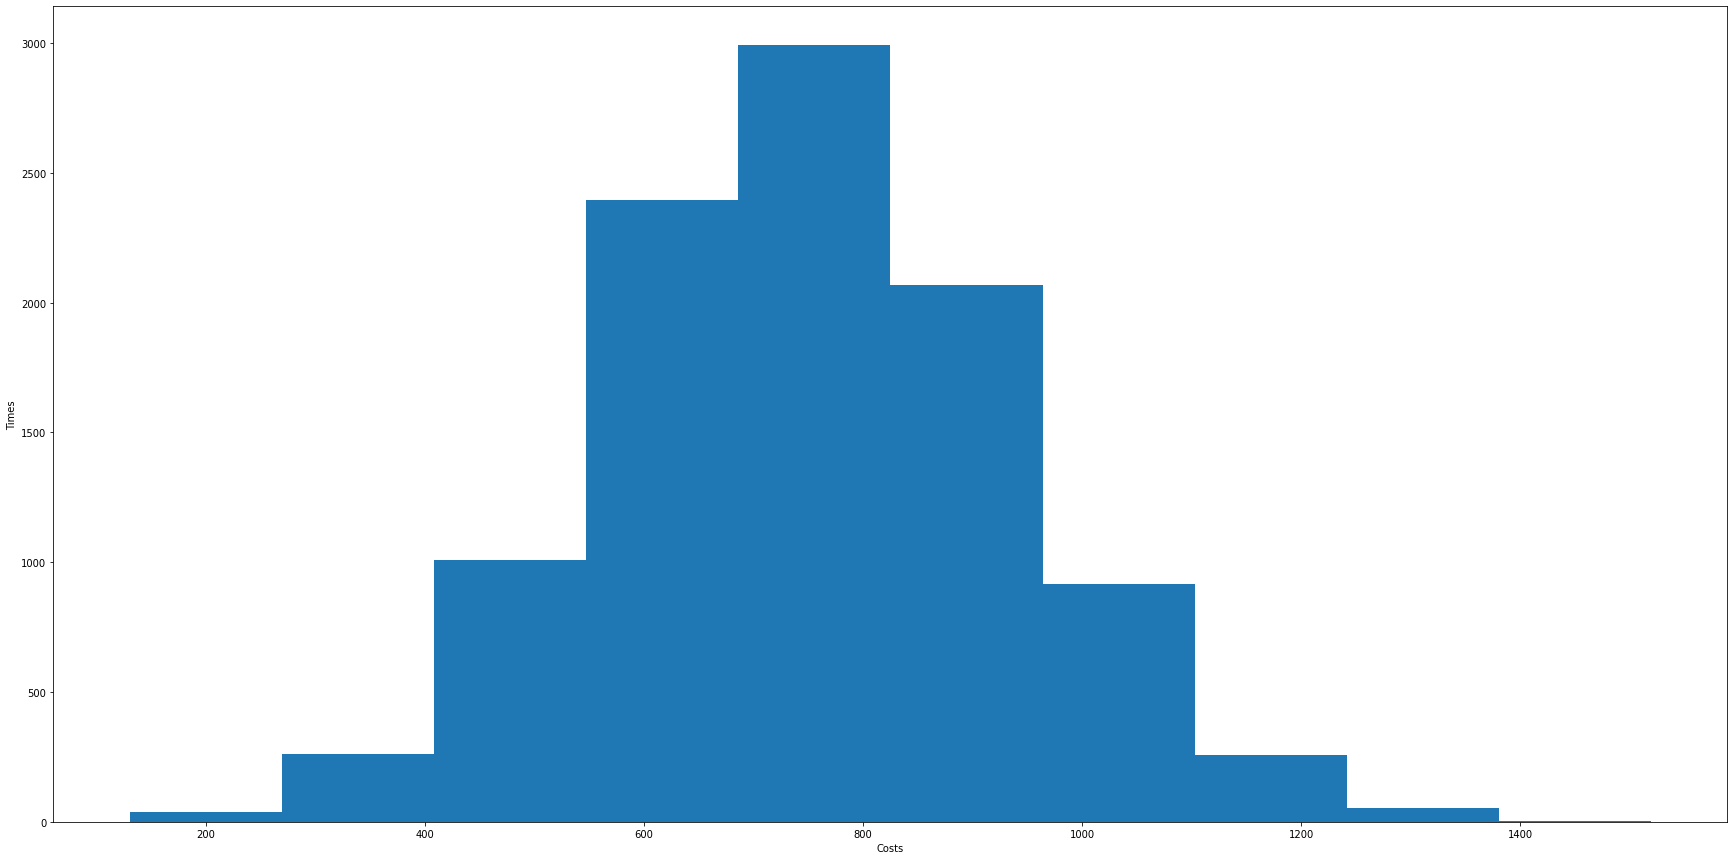

In [9]:
def week_cost():
    return sum([
        daily_cost(),
        daily_cost(),
        daily_cost(),
        daily_cost(),
        daily_cost(),
    ])


total_for_weeks = []
more_than_900 = 0
for _ in range(10000):
    cost_per_week = week_cost()
    if cost_per_week > 900:
        more_than_900 += 1
    total_for_weeks.append(cost_per_week)


plt.figure(figsize=(30, 15))
plt.xlabel('Costs')
plt.ylabel('Times')
_ = plt.hist(total_for_weeks, bins=10)

print("La probabilidad de que el gasto semanal supere los 900€ es de un {0}%".format((more_than_900 * 100 / len(total_for_weeks))))

## Pregunta 4

El departamento de contabilidad exige que cerremos el presupuesto diario por adelantado, para pedir un préstamo para financiar las operaciones del mes siguiente.

No podemos pagar suficiente para garantizar que nunca se quede nadie sin servicio.

Hemos decidido que vamos bien si el 90% de los días todos los jobs de FEA encolados acaban: es aceptable que se queden jobs sin acabar en un 10% de los días.

¿Cuánto es lo mínimo que tenemos que pagar al día para tener una probabilidad del 90% de tener capacidad para todos los jobs?

In [12]:

def get_costs_by_day(days):
    costs_by_day = []
    for _ in range(days):
        costs_by_day.append(daily_cost())
    return costs_by_day


costs = get_costs_by_day(10000)
costs.sort()
costs_90 = costs[:-1000]
most_expensive_cost = costs_90[-1]

print("Lo mínimo que tenemos que pagar al día para una probabilidad del 90% es {0}€".format(most_expensive_cost))


Lo mínimo que tenemos que pagar al día para una probabilidad del 90% es 260€
